In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_year2= pd.read_excel('2__year.xlsx')

In [ ]:
df_year2

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.51710,-14.54700,0.510690,0.253660,0.918160,1.15190,0.426950,...,0.131840,0.473950,0.86816,0.000240,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.33820,-37.85900,-0.000319,0.041670,0.678900,0.32356,0.404370,...,0.121460,0.074369,0.87235,0.000000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.22110,71.79900,0.000000,0.318770,2.332000,1.67620,0.698410,...,0.164990,0.369210,0.81614,0.000000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.08280,-88.21200,0.000000,0.285050,0.473840,1.32410,0.321500,...,0.293580,0.706570,0.78617,0.484560,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.94440,21.73100,0.187900,0.108230,1.371400,1.11260,0.521670,...,0.101240,0.163790,0.89876,0.000000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10168,0.029970,0.66806,0.066243,1.11030,-105.55000,0.029970,0.038888,0.482740,1.02920,0.322500,...,0.028377,0.092931,0.97162,0.209820,3.0914,3.94560,192.220,1.89880,3.4199,b'1'
10169,0.012843,0.49306,-0.160620,0.61898,-24.80100,0.012843,0.012843,0.905900,1.01450,0.446660,...,0.014247,0.028752,0.98575,0.160090,48.6660,63.75200,40.071,9.10870,5.1956,b'1'
10170,0.015092,0.55759,-0.284600,0.48599,-85.57100,0.015092,0.009826,0.694880,1.00600,0.387460,...,0.005971,0.038950,0.99403,0.010091,15.0530,11.96400,114.250,3.19480,2.4201,b'1'
10171,-0.002554,0.47076,0.424010,1.90070,0.95483,-0.002554,0.001785,1.114400,0.99293,0.524640,...,-0.007122,-0.004869,1.00710,0.000000,6.4289,5.70250,64.291,5.67730,25.3990,b'1'


In [ ]:
# Converted all features to numeric (invalid strings become NaN)
# Excluded the target column from this step
feature_cols = df_year2.columns[:-1]  # assuming last column is 'class'
df_year2[feature_cols] = df_year2[feature_cols].apply(pd.to_numeric, errors='coerce')

#  Clean the target column: convert from bytes (e.g., b'0') to integer
df_year2['class'] = df_year2['class'].astype(str).str.extract(r'(\d)').astype(int)

In [ ]:
# Separated features and target
X = df_year2.iloc[:, :-1]  # first 64 columns (financial features)
y = df_year2.iloc[:, -1]   # last column ('class')

In [ ]:
from sklearn.impute import KNNImputer


In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

In [ ]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install shap

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
import shap


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_lr = []
cm_lr=[]
roc_lr = {}
shap_values_lr = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (bankrupt)


        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_threshold = thresholds[np.argmax(f1_scores)]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_lr.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_lr.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_lr[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))


        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_lr = pd.DataFrame(results_lr)

# Round for readability
results_df_lr = results_df_lr.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_lr)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.7533,0.0863,0.5500,0.7616,0.1492,0.6838
1,BorderlineSMOTE,0.7769,0.0807,0.4500,0.7903,0.1369,0.6713
2,ADASYN,0.7219,0.0881,0.6500,0.7248,0.1552,0.6887
3,SVMSMOTE,0.7101,0.0792,0.6000,0.7146,0.1399,0.6703
4,SMOTEENN,0.8201,0.0891,0.3875,0.8379,0.1449,0.6824
5,SMOTETomek,0.8000,0.0902,0.4500,0.8143,0.1503,0.6828


SMOTE


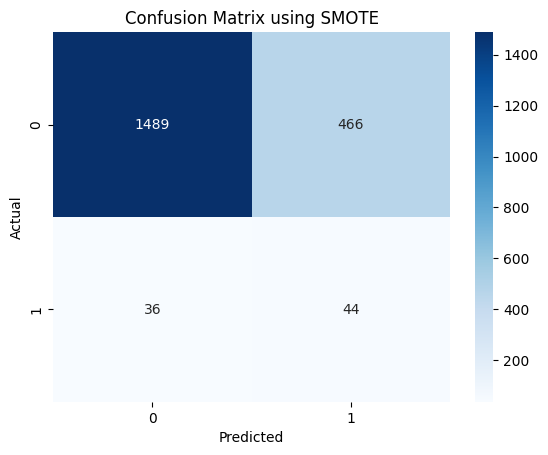

BorderlineSMOTE


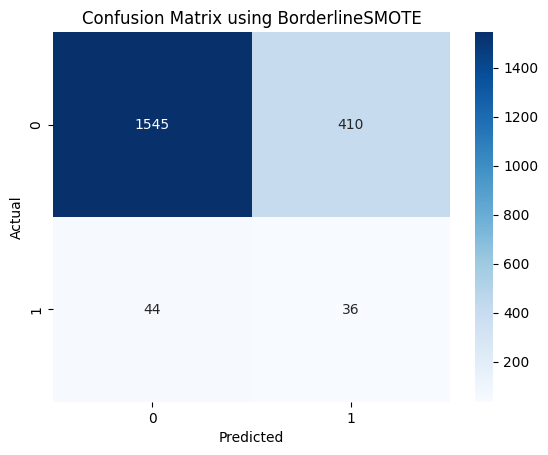

ADASYN


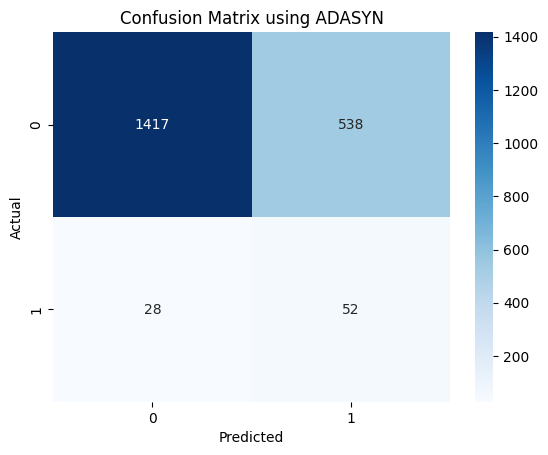

SVMSMOTE


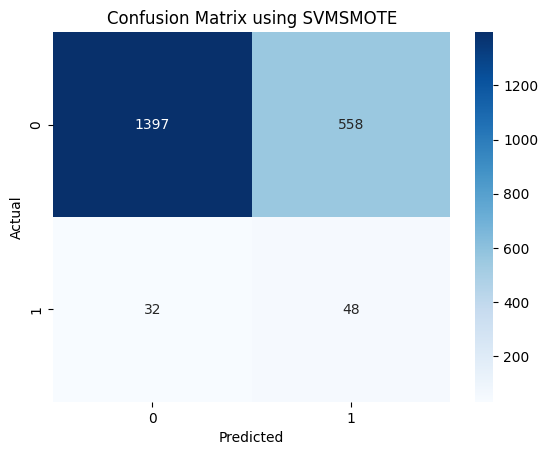

SMOTEENN


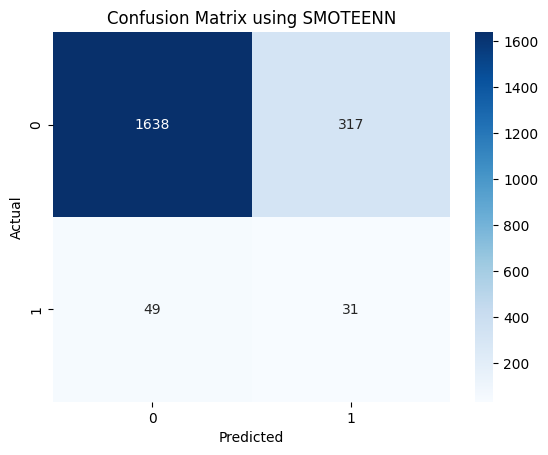

SMOTETomek


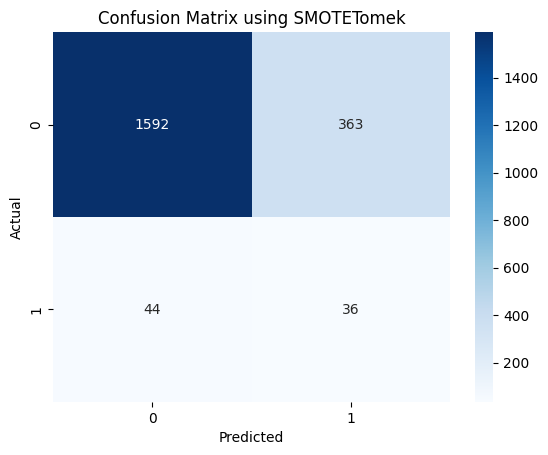

In [ ]:
#confusion matrix plot
for x in cm_lr:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

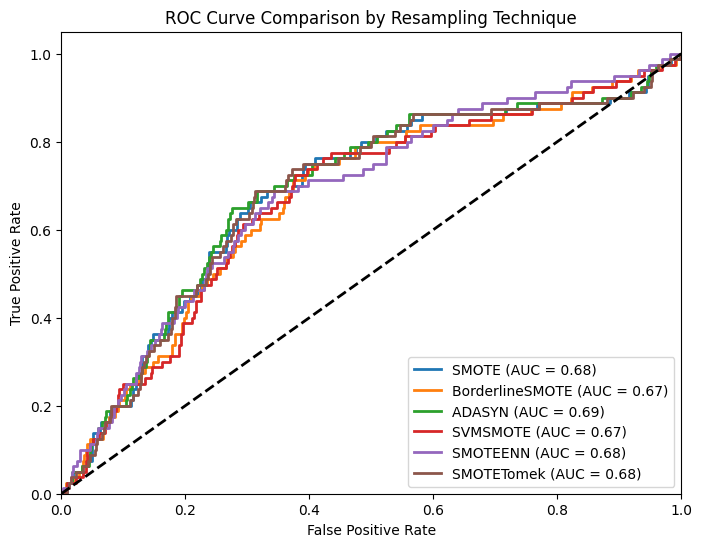

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_lr.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_svm = []
cm_svm=[]
roc_svm = {}
shap_values_svm = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', SVC(class_weight='balanced', kernel='rbf', C=.1, probability=True, random_state=42))])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]



        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_svm.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_svm.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_svm[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))


        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_svm = pd.DataFrame(results_svm)

# Round for readability
results_df_svm = results_df_svm.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_svm)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.5946,0.0612,0.6500,0.5923,0.1119,0.6686
1,BorderlineSMOTE,0.8039,0.0630,0.2875,0.8251,0.1034,0.6585
2,ADASYN,0.5961,0.0666,0.7125,0.5913,0.1218,0.6743
3,SVMSMOTE,0.8256,0.0662,0.2625,0.8486,0.1058,0.6489
4,SMOTEENN,0.4722,0.0555,0.7750,0.4598,0.1035,0.6584
5,SMOTETomek,0.5941,0.0612,0.6500,0.5918,0.1118,0.6686


SMOTE


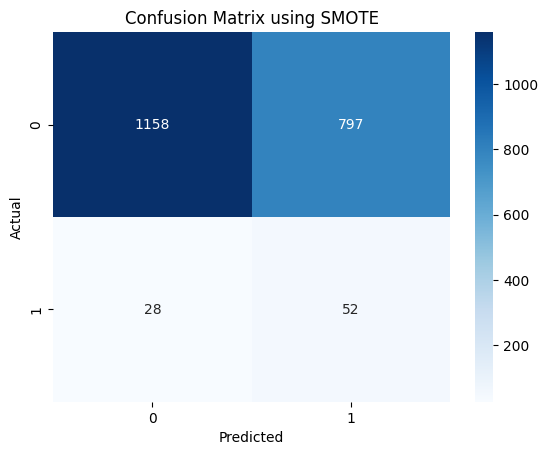

BorderlineSMOTE


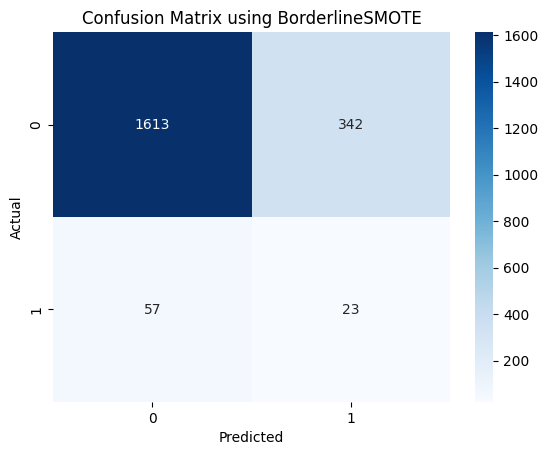

ADASYN


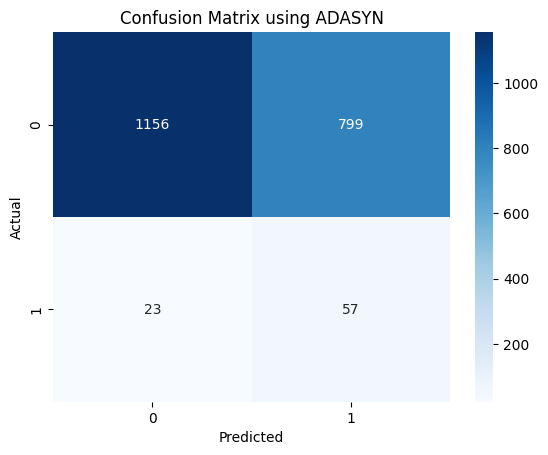

SVMSMOTE


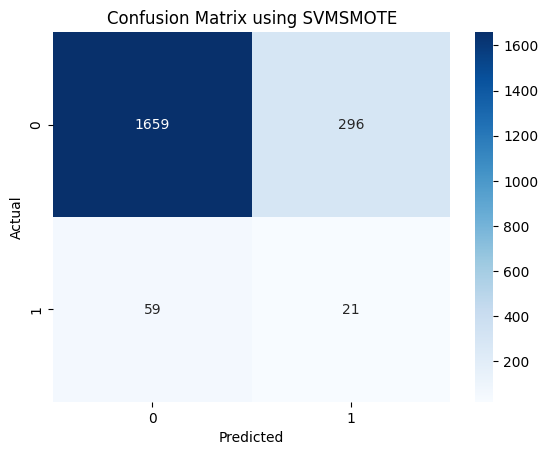

SMOTEENN


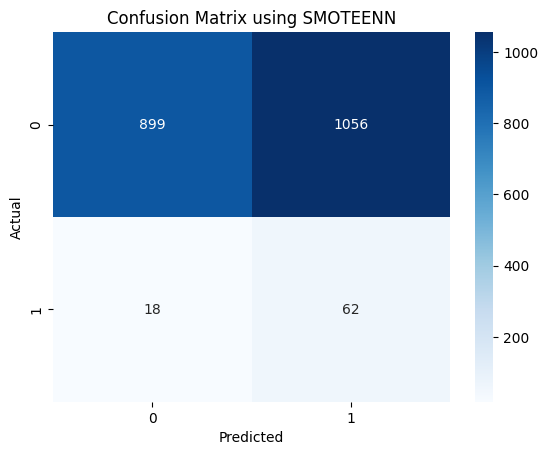

SMOTETomek


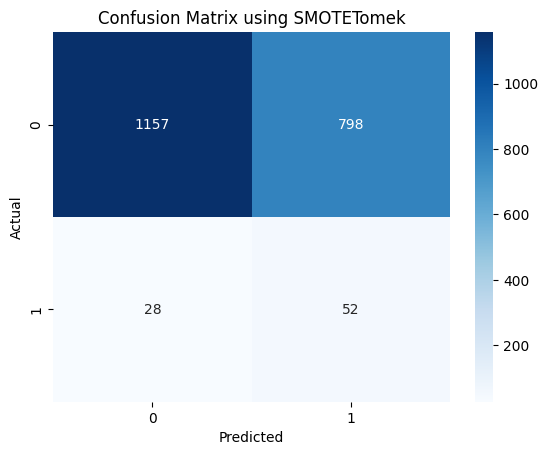

In [ ]:
#confusion matrix plot
for x in cm_svm:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

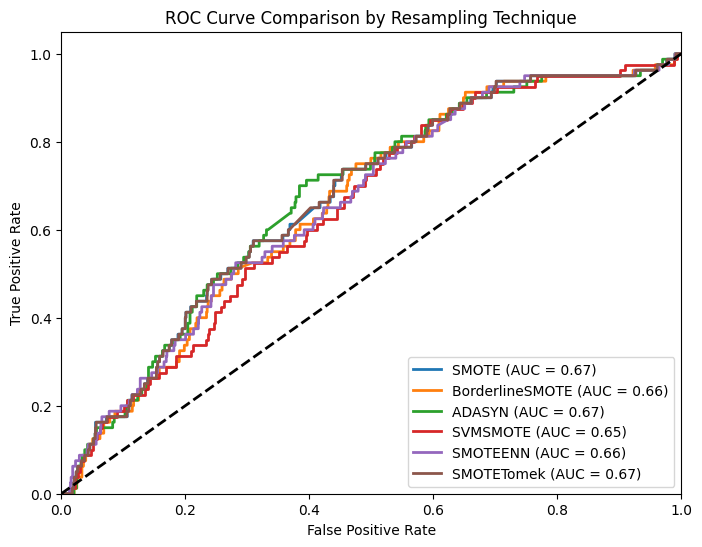

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_svm.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_rf = []
cm_rf=[]
roc_rf = {}
shap_values_rf = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = RandomForestClassifier(class_weight="balanced", random_state=42)
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.3).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_rf.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_rf.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_rf[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_rf = pd.DataFrame(results_rf)

# Round for readability
results_df_rf = results_df_rf.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_rf)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8560,0.1365,0.5000,0.8706,0.2145,0.7891
1,BorderlineSMOTE,0.8924,0.1508,0.3750,0.9136,0.2151,0.7750
2,ADASYN,0.8516,0.1396,0.5375,0.8645,0.2216,0.7850
3,SVMSMOTE,0.9174,0.1615,0.2625,0.9442,0.2000,0.7842
4,SMOTEENN,0.7484,0.1044,0.7125,0.7499,0.1821,0.7737
5,SMOTETomek,0.8590,0.1468,0.5375,0.8721,0.2306,0.8029


SMOTE


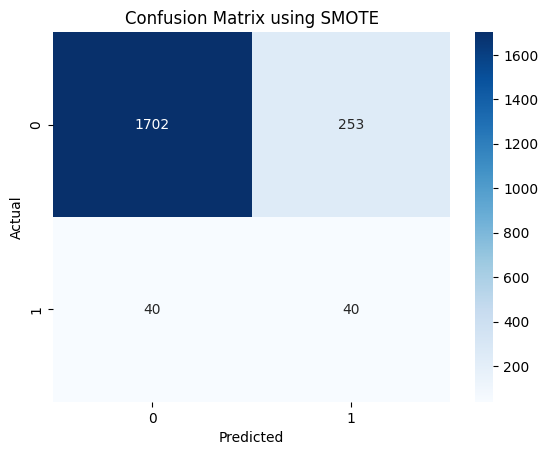

BorderlineSMOTE


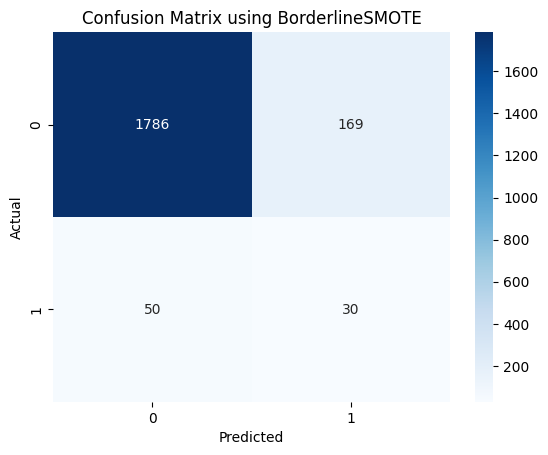

ADASYN


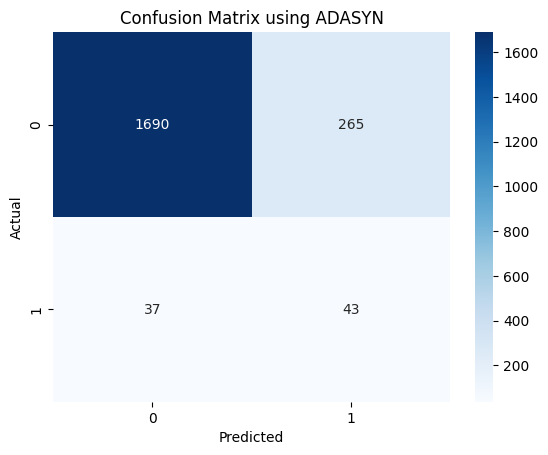

SVMSMOTE


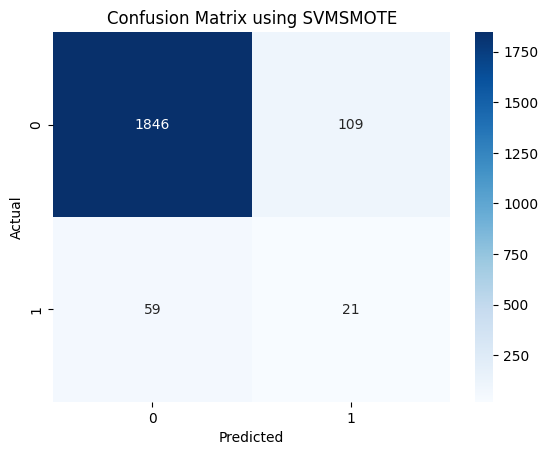

SMOTEENN


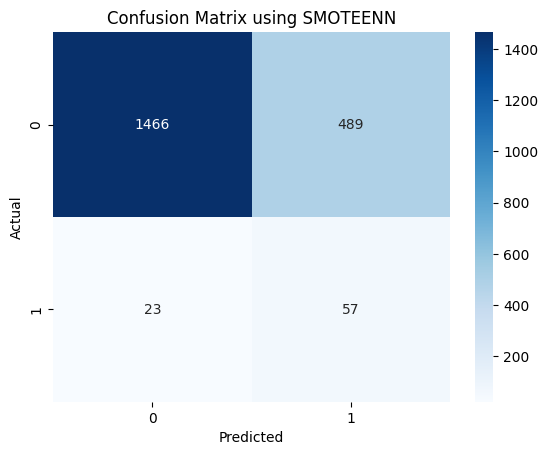

SMOTETomek


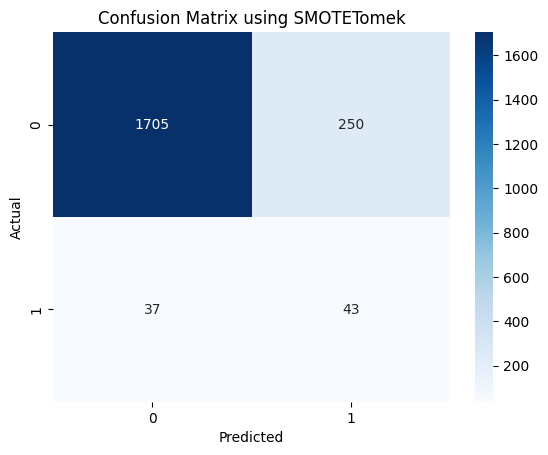

In [ ]:
#confusion matrix plot
for x in cm_rf:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

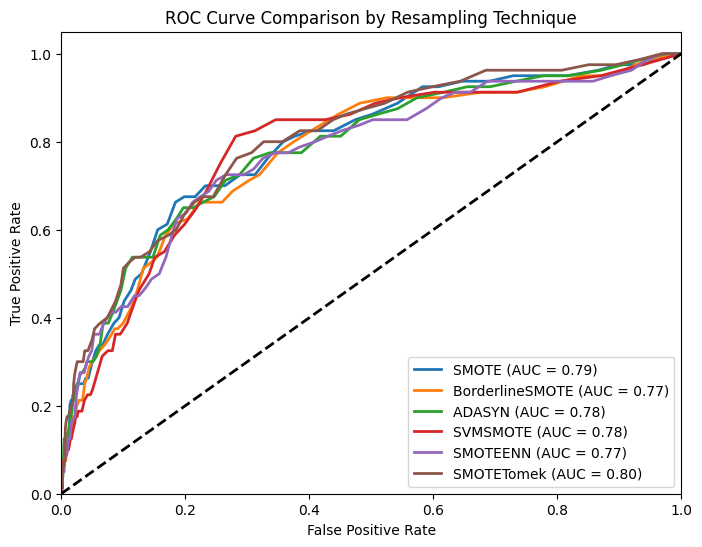

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_rf.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_xgb = []
cm_xgb=[]
roc_xgb = {}
shap_values_xgb = []


for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:

        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = XGBClassifier(eval_metric='logloss',
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        )
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= 0.1).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_xgb.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_xgb.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_xgb[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_xgb.append({name:shap_values})

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")



Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_xgb = pd.DataFrame(results_xgb)

# Round for readability
results_df_xgb = results_df_xgb.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_xgb)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.6638,0.0822,0.8108,0.6583,0.1493,0.8311
1,BorderlineSMOTE,0.7163,0.0865,0.7117,0.7164,0.1543,0.8125
2,ADASYN,0.6537,0.0807,0.8198,0.6474,0.1469,0.8244
3,SVMSMOTE,0.7654,0.1046,0.7207,0.7671,0.1826,0.8389
4,SMOTEENN,0.6045,0.0752,0.8739,0.5944,0.1385,0.8225
5,SMOTETomek,0.6642,0.0861,0.8559,0.6569,0.1564,0.8370


SMOTE


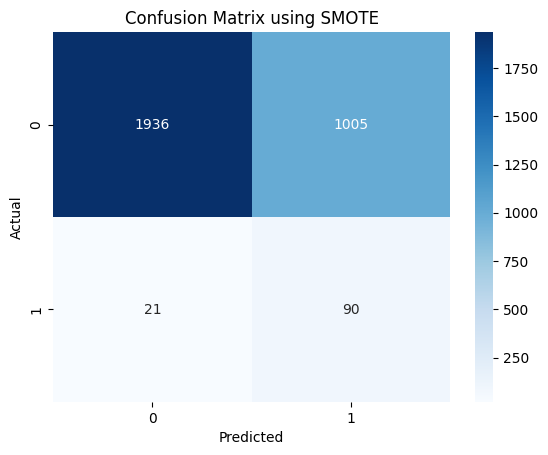

BorderlineSMOTE


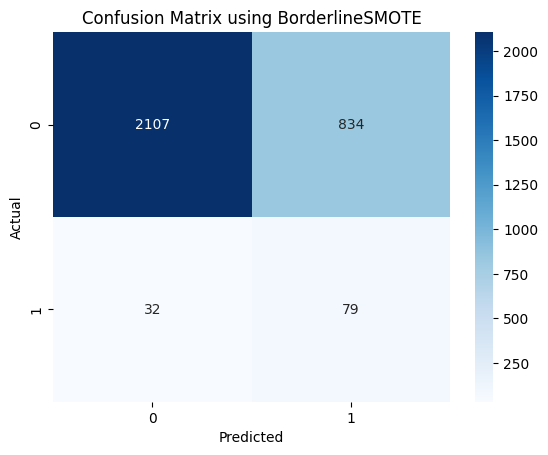

ADASYN


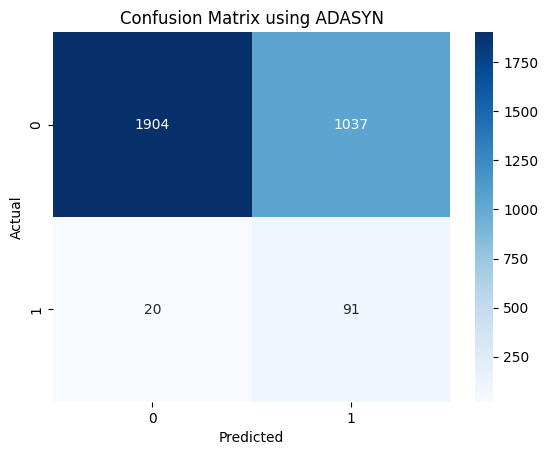

SVMSMOTE


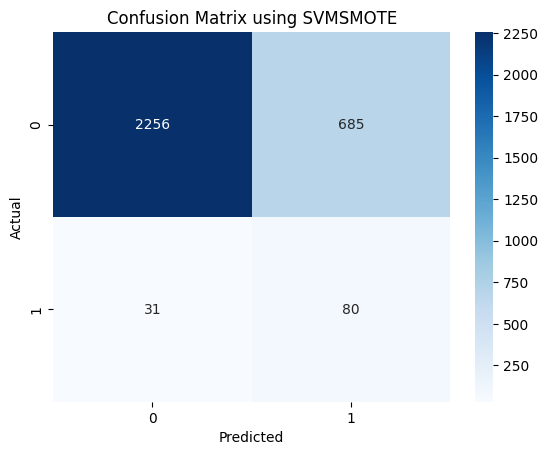

SMOTEENN


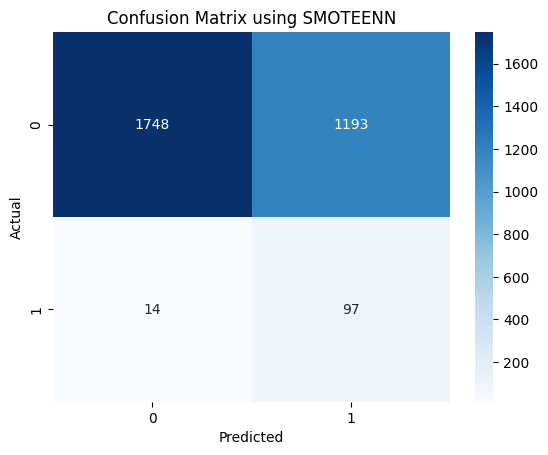

SMOTETomek


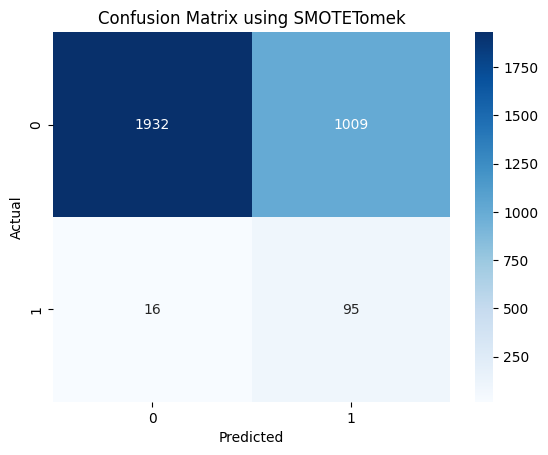

In [ ]:
#confusion matrix plot
for x in cm_xgb:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

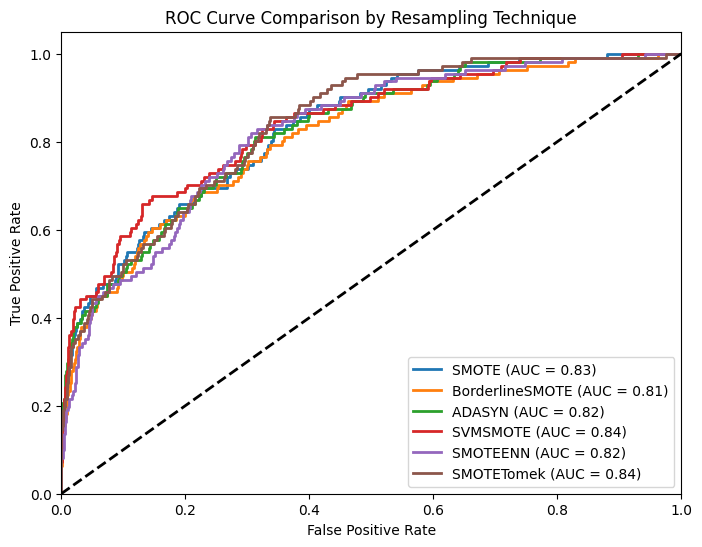

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_xgb.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

SMOTE


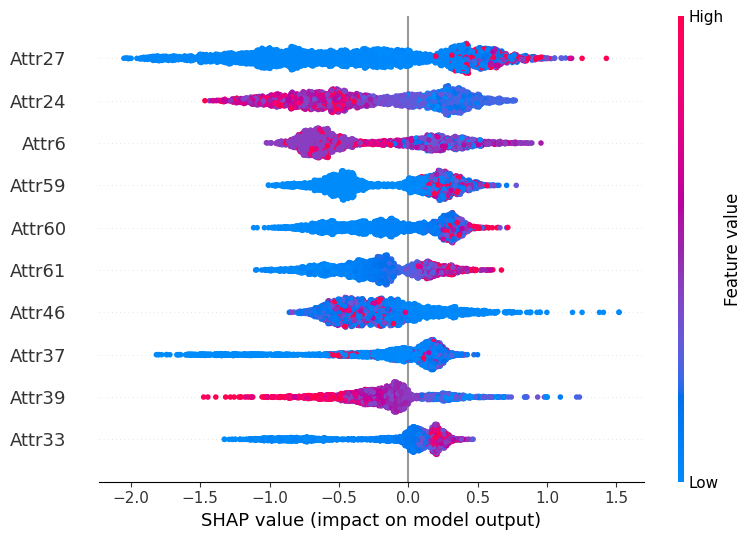

BorderlineSMOTE


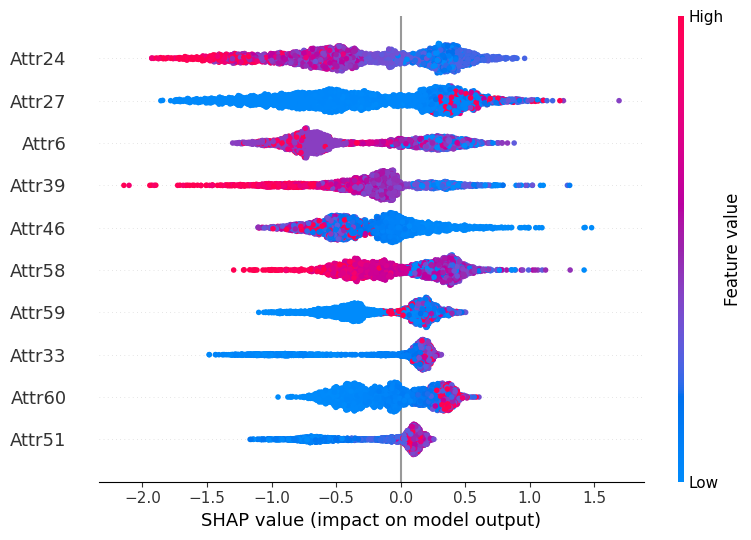

ADASYN


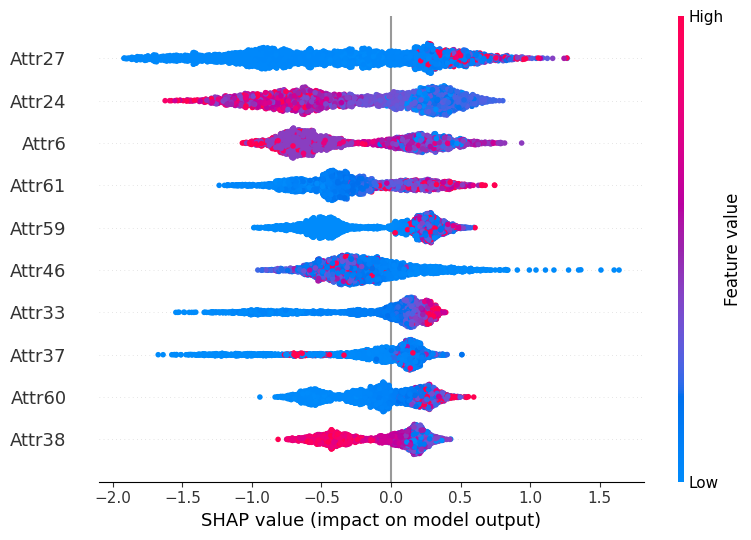

SVMSMOTE


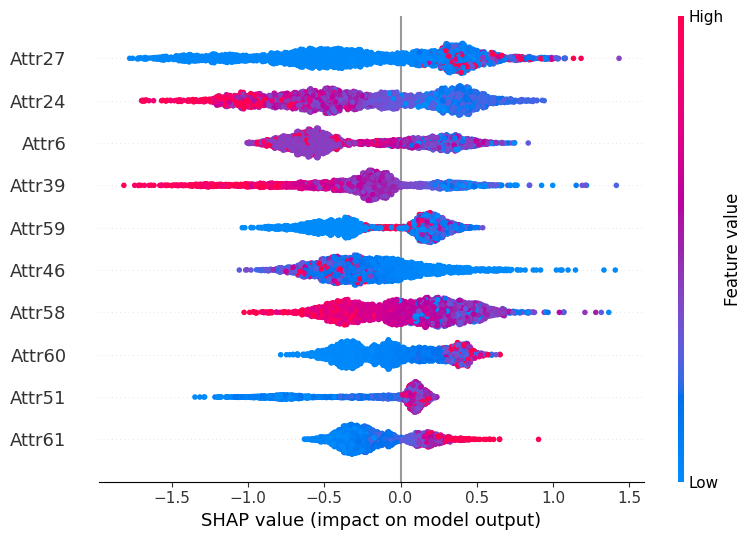

SMOTEENN


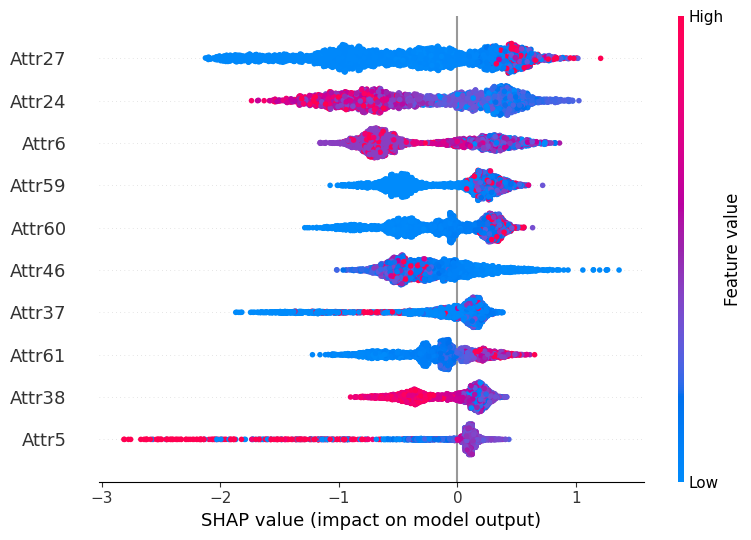

SMOTETomek


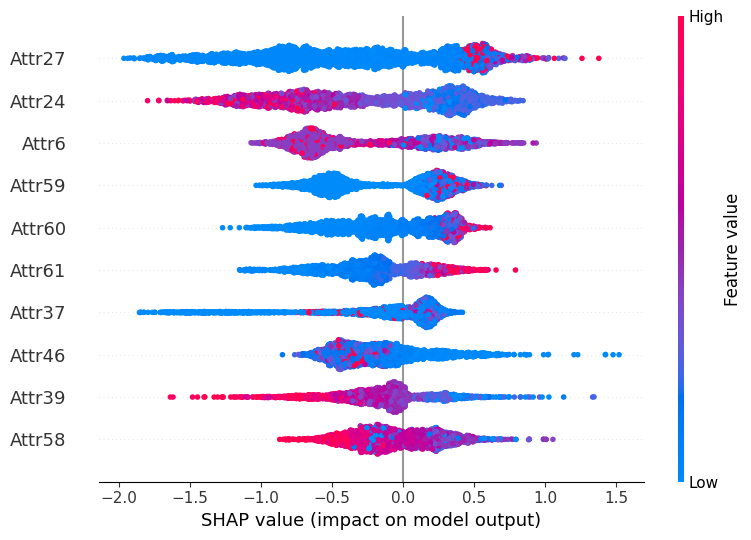

In [ ]:
for x in shap_values_xgb:
    for k in x:
        print(k)
    shap.summary_plot(x[k], X_test, max_display=10)



**ANN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l2


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_ann = []
cm_ann=[]
roc_ann = {}
shap_values_ann = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

        model = Sequential([
              Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
              BatchNormalization(),
              Dropout(0.5),
              Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
              BatchNormalization(),
              Dropout(0.3),
              Dense(1, activation='sigmoid')])

        bankrupt_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
        optimizer = Adam(learning_rate=0.0001, clipvalue=0.5)
        model.compile(
             optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['Recall', 'Precision'])


        y_prob = model.predict(X_test_scaled).flatten()
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_ann.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_ann.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_ann[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")


Using SMOTE...
 1/64 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ SMOTE completed

Using BorderlineSMOTE...
 1/64 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ BorderlineSMOTE completed

Using ADASYN...
 1/64 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ ADASYN completed

Using SVMSMOTE...
 1/64 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ SVMSMOTE completed

Using SMOTEENN...
 1/64 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ SMOTEENN completed

Using SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_ann = pd.DataFrame(results_ann)

# Round for readability
results_df_ann = results_df_ann.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_ann)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.1818,0.0438,0.9500,0.1504,0.0837,0.4981
1,BorderlineSMOTE,0.1563,0.0430,0.9625,0.1233,0.0823,0.5187
2,ADASYN,0.8771,0.0750,0.1875,0.9054,0.1071,0.5704
3,SVMSMOTE,0.8541,0.0643,0.2000,0.8808,0.0973,0.5250
4,SMOTEENN,0.7966,0.0511,0.2375,0.8194,0.0841,0.5077
5,SMOTETomek,0.0899,0.0409,0.9875,0.0532,0.0786,0.4826


SMOTE


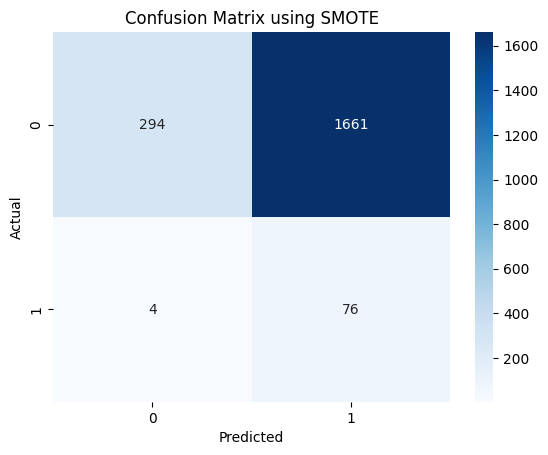

BorderlineSMOTE


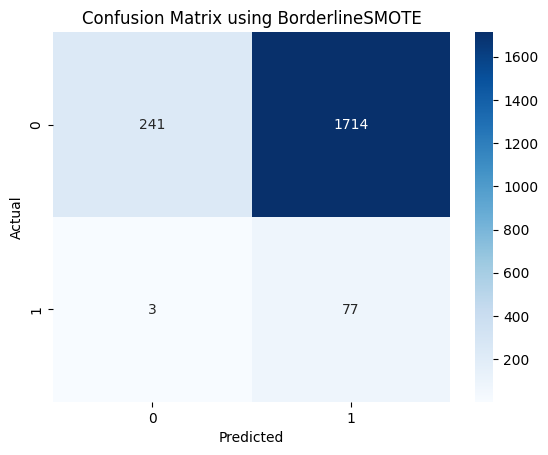

ADASYN


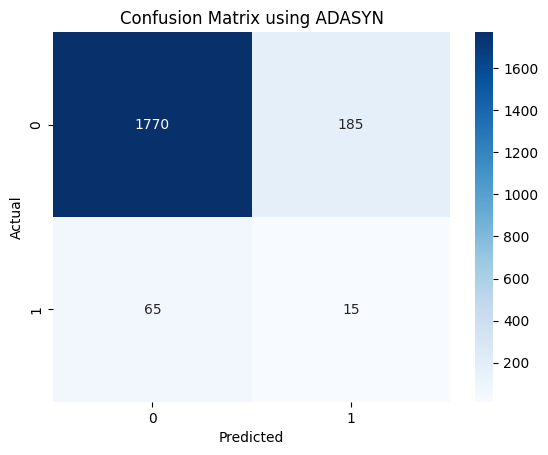

SVMSMOTE


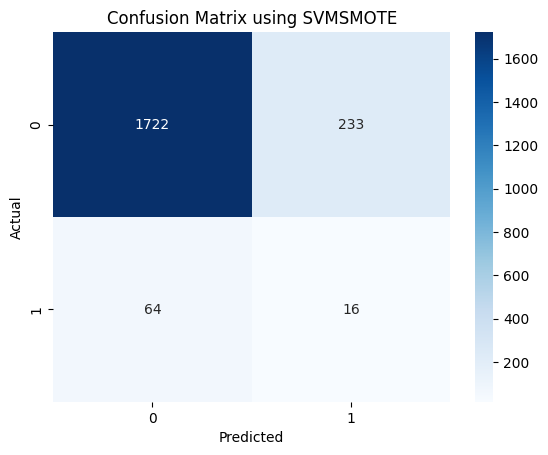

SMOTEENN


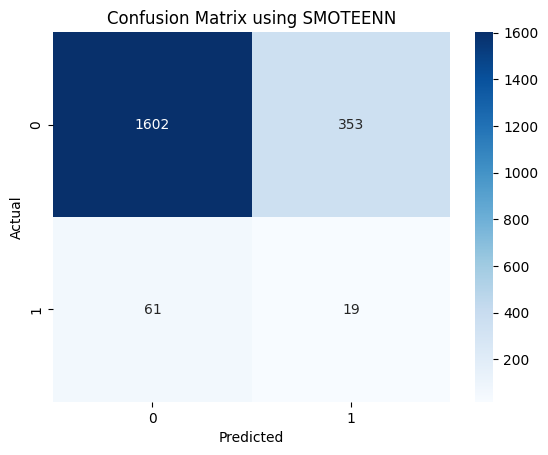

SMOTETomek


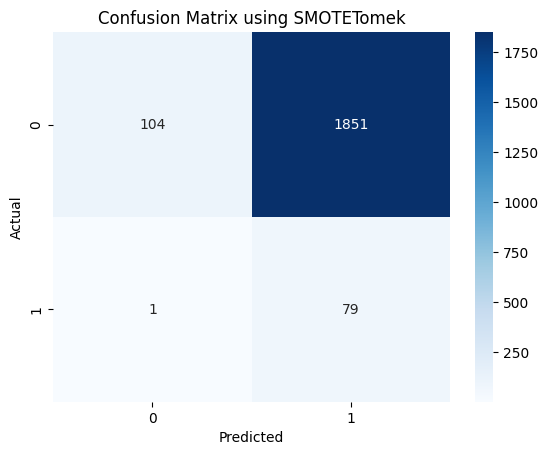

In [ ]:
#confusion matrix plot
for x in cm_ann:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

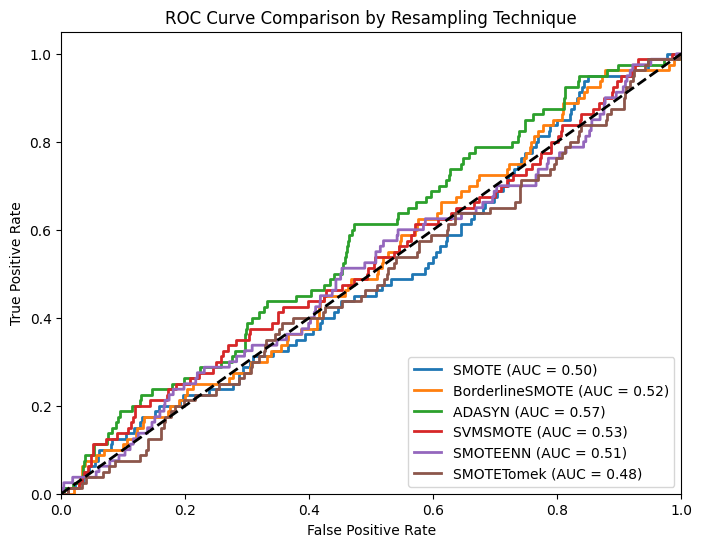

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_ann.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**MLP (6 Layers)**

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_mlp = []
cm_mlp=[]
roc_mlp = {}
shap_values_mlp = []

for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X1_resampled, y1_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # Define a 6-layer MLP
        model = Sequential([
            Dense(128, activation='relu', input_dim=X1_resampled.shape[1]),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X1_resampled, y1_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_mlp.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_mlp.append({name:cm})

         # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_mlp[name] = (fpr, tpr, roc_auc_score(y_test, y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_mlp.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Create DataFrame
results_df_mlp= pd.DataFrame(results_mlp)

# Round for readability
results_df_mlp = results_df_mlp.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_mlp)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.8143,0.0884,0.4000,0.8312,0.1448,0.6594
1,BorderlineSMOTE,0.8703,0.0893,0.2500,0.8957,0.1316,0.7069
2,ADASYN,0.6816,0.0723,0.6000,0.6849,0.1290,0.6801
3,SVMSMOTE,0.8830,0.0842,0.2000,0.9110,0.1185,0.6621
4,SMOTEENN,0.7224,0.0768,0.5500,0.7294,0.1348,0.6850
5,SMOTETomek,0.8418,0.0912,0.3375,0.8624,0.1436,0.6918


SMOTE


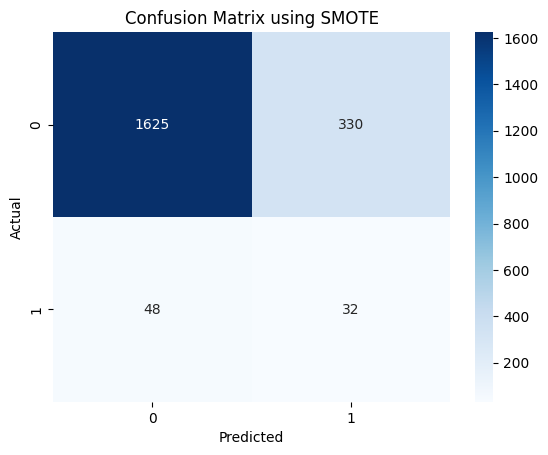

BorderlineSMOTE


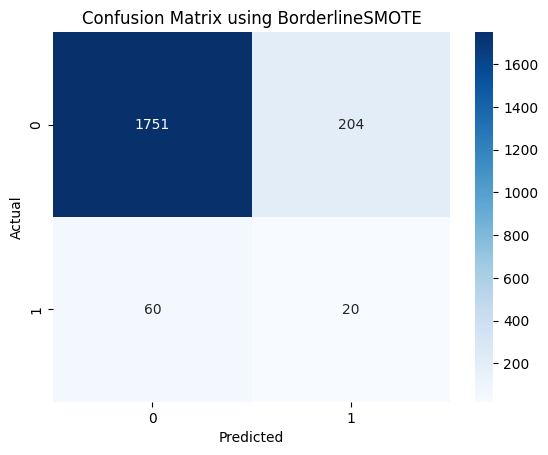

ADASYN


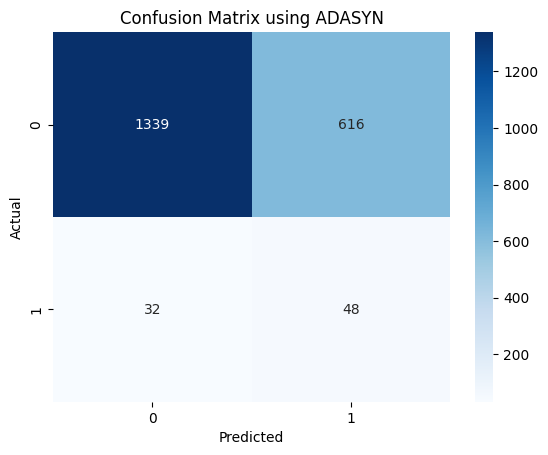

SVMSMOTE


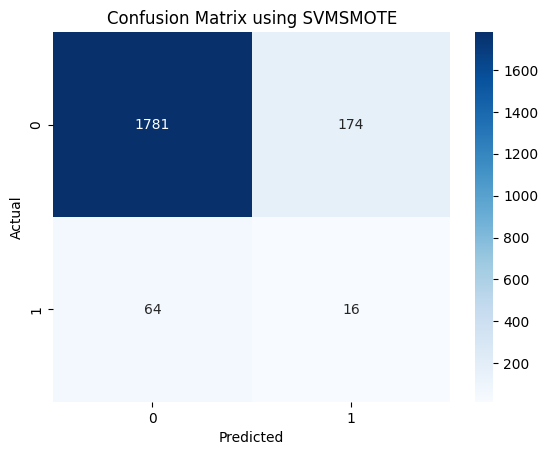

SMOTEENN


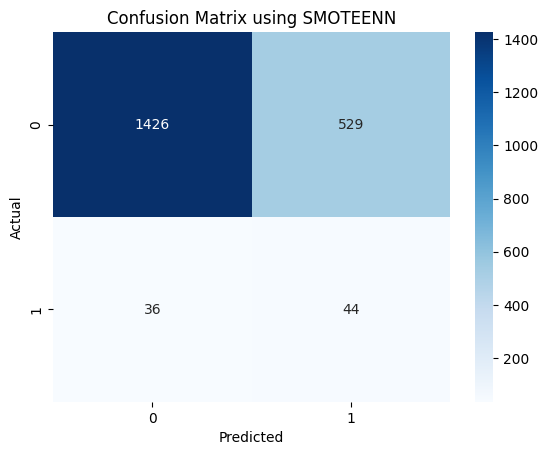

SMOTETomek


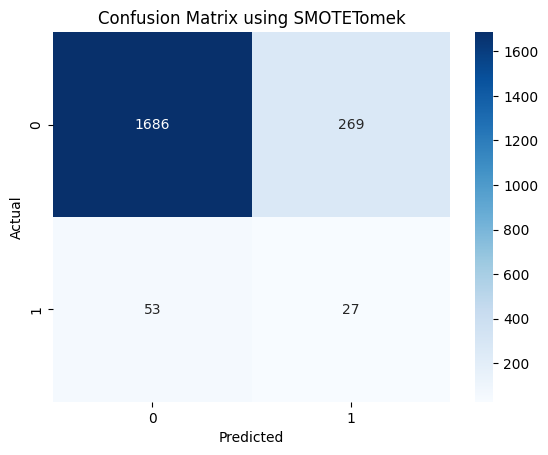

In [ ]:
#confusion matrix plot
for x in cm_mlp:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

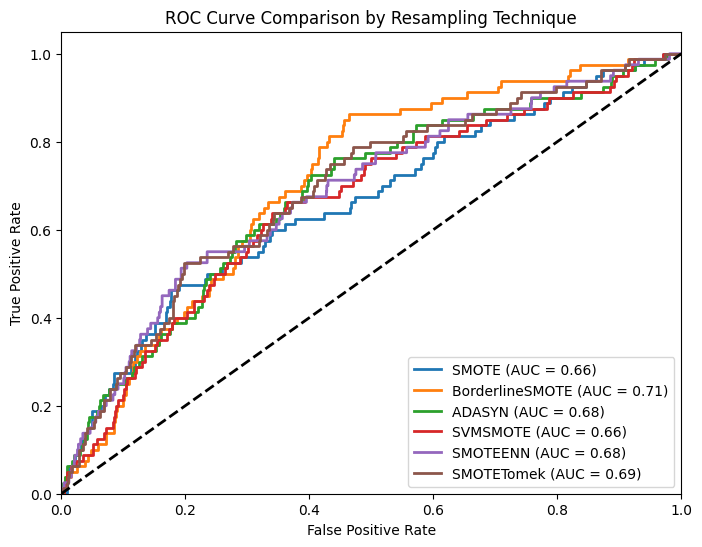

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_mlp.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**CNN**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_cnn = []
cm_cnn=[]
roc_cnn = {}
shap_values_cnn = []


for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # 1D CNN
        model = Sequential([
              Conv1D(filters=64, kernel_size=3, activation='relu',
                     input_shape=(X_train.shape[1], 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.4),

                     Conv1D(filters=128, kernel_size=2, activation='relu'),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.3),

                     Flatten(),

                     Dense(64, activation='relu'),
                     BatchNormalization(),
                     Dropout(0.3),

                    Dense(1, activation='sigmoid')])

        model.compile( optimizer=Adam(learning_rate=0.0005),
                      loss='binary_crossentropy',
                      metrics=['Recall', 'Precision'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X_resampled, y_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_cnn.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_cnn.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
        roc_cnn[name] = (fpr, tpr, roc_auc_score(y_test,  y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_cnn.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Create DataFrame
results_df_cnn= pd.DataFrame(results_cnn)

# Round for readability
results_df_cnn = results_df_cnn.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_cnn)


📊 Comparison of Resampling Techniques:


,Resampling,Accuracy,Precision,Recall (Sensitivity),Specificity,F1 Score,ROC AUC
0,SMOTE,0.6619,0.0670,0.5875,0.6650,0.1202,0.6940
1,BorderlineSMOTE,0.7081,0.0629,0.4625,0.7182,0.1108,0.6573
2,ADASYN,0.5690,0.0645,0.7375,0.5621,0.1186,0.6878
3,SVMSMOTE,0.9587,0.0000,0.0000,0.9980,0.0000,0.6672
4,SMOTEENN,0.4093,0.0562,0.8875,0.3898,0.1057,0.7358
5,SMOTETomek,0.5219,0.0592,0.7500,0.5125,0.1098,0.6982


SMOTE


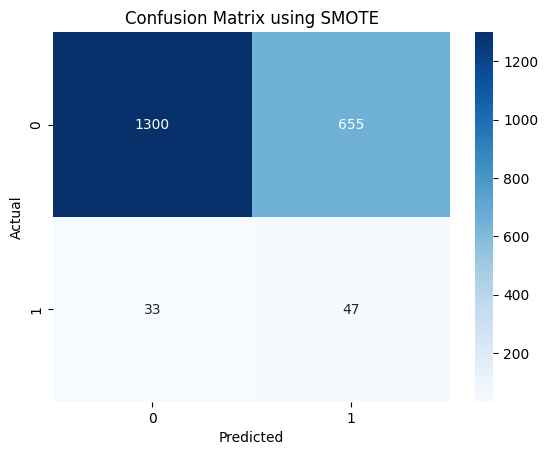

BorderlineSMOTE


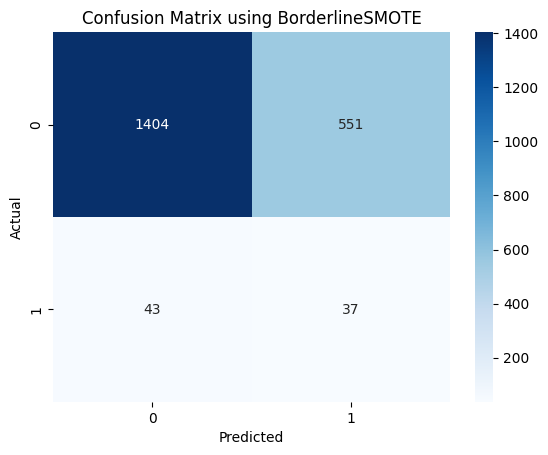

ADASYN


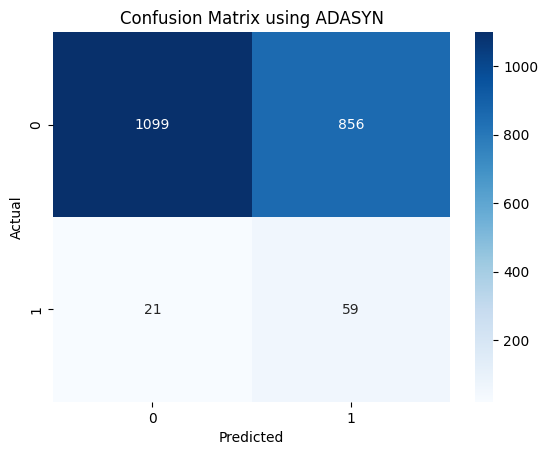

SVMSMOTE


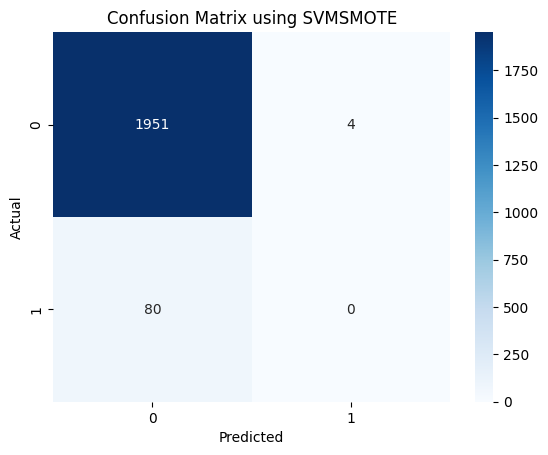

SMOTEENN


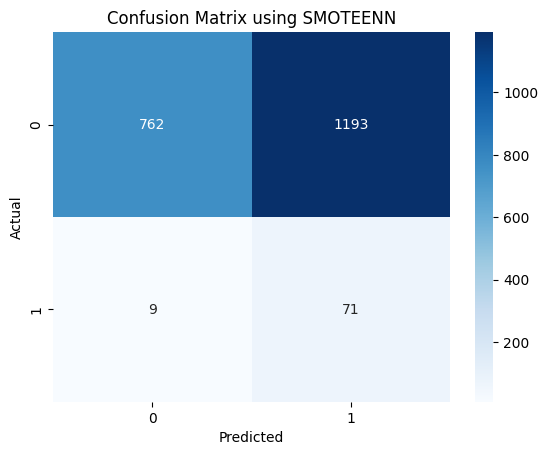

SMOTETomek


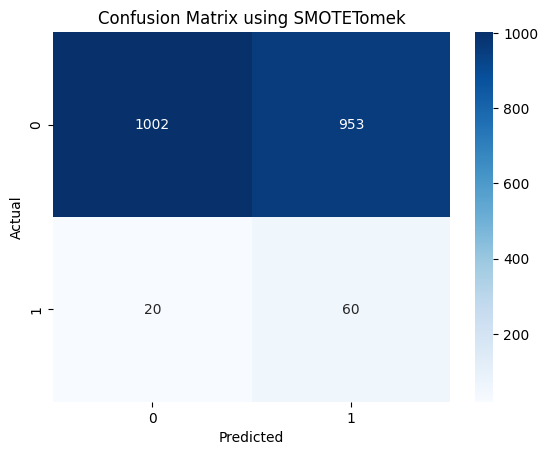

In [ ]:
#confusion matrix plot
for x in cm_cnn:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

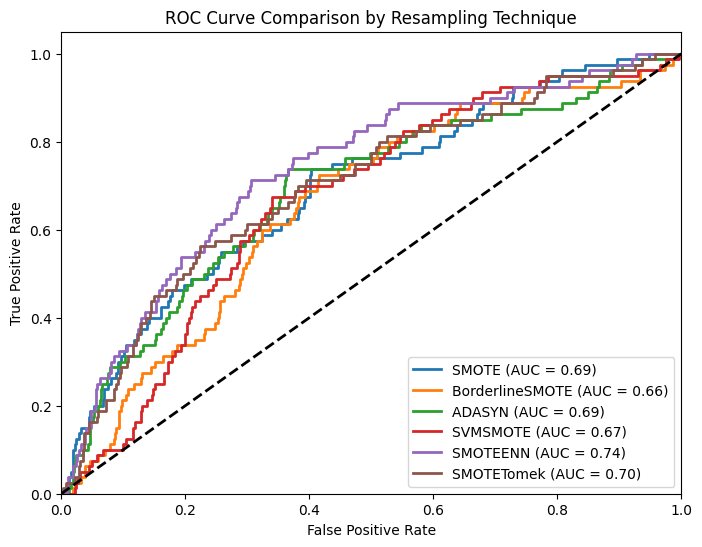

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_cnn.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()